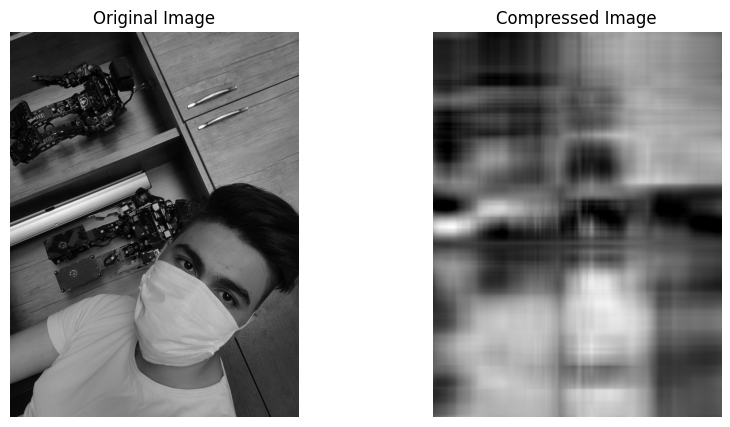

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compress_image_svd(image, k):
    # Perform SVD on the image
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    
    # Truncate the singular values
    S[k:] = 0
    
    # Reconstruct the compressed image
    compressed_image = np.dot(U, np.dot(np.diag(S), Vt))
    
    # Clip to ensure pixel values are in the valid range [0, 255]
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
    
    return compressed_image

def find_optimal_rank(image, target_compression_ratio):
    # Calculate SVD with full rank to obtain singular values
    _, S, _ = np.linalg.svd(image, full_matrices=False)
    
    # Calculate total variance
    total_variance = np.sum(S ** 2)
    
    # Initialize variables
    cumulative_variance = 0
    optimal_rank = 0
    
    # Find optimal rank based on target compression ratio
    for i, singular_value in enumerate(S):
        cumulative_variance += singular_value ** 2
        compression_ratio = cumulative_variance / total_variance
        if compression_ratio >= target_compression_ratio:
            optimal_rank = i + 1
            break
    
    return optimal_rank

def main():
    input_image_path = 'test.jpg'
    output_image_path = 'compressed_image.jpg'
    target_compression_ratio = 0.9  # Adjust this value to control compression level
    
    # Load the image
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
    
    try:
        # Find the optimal rank based on the target compression ratio
        optimal_rank = find_optimal_rank(image, target_compression_ratio)
        
        # Compress the image using SVD
        compressed_image = compress_image_svd(image, optimal_rank)
    
        # Save the compressed image
        cv2.imwrite(output_image_path, compressed_image)
    
        # Display the original and compressed images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(compressed_image, cmap='gray')
        plt.title('Compressed Image')
        plt.axis('off')
        
        plt.show()
    
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()
